# `Loan Prediction`

## TASK : Given various features about a customer like 
## `Age, Income, Loan Amount, Loan Intent, Home Ownership etc..` , 
## predict if in case the loan is given, will the customer 
## `default or not on the Loan payments`.

In [1]:
# import required libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
dataset = pd.read_csv("data/Credit_risk_dataset.csv")

In [3]:
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Data Preprocessing

In [4]:
# checking duplicates in dataset
dataset_dup = dataset.duplicated()

In [5]:
dataset[dataset_dup]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [6]:
# Removing duplicates 
dataset.drop_duplicates(inplace = True)

In [7]:
# Shape of dataset (Number of rows and columns)
dataset.shape

(32416, 12)

In [8]:
dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
#Information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [10]:
dataset.isnull().any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [11]:
# Finding missing values in dataset
dataset.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
dataset = dataset.drop("loan_percent_income", axis = 1)

In [13]:
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,N,26


### Handling Missing values 

In [14]:
dataset.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
missing_values = dataset[dataset.isnull().any(axis = 1)]

In [16]:
missing_values

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,N,4
...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,N,23


In [17]:
dataset.mean()

person_age                       27.747008
person_income                 66091.640826
person_emp_length                 4.790510
loan_amnt                      9593.845632
loan_int_rate                    11.017265
loan_status                       0.218688
cb_person_cred_hist_length        5.811297
dtype: float64

In [18]:
# Filling missing values with mean
dataset.fillna(dataset.mean(), inplace = True)

In [19]:
dataset.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='person_age', ylabel='loan_status'>

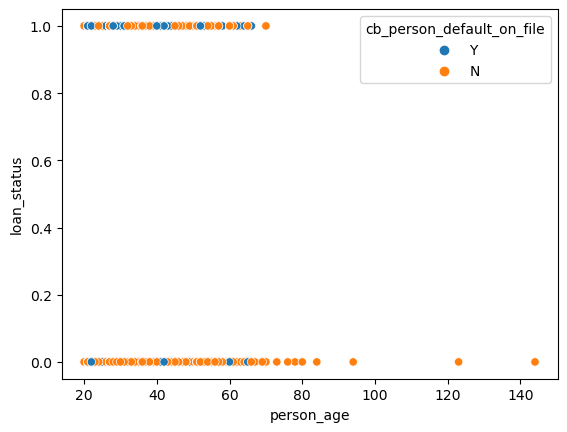

In [20]:
sns.scatterplot(x = dataset["person_age"], y = dataset["loan_status"],hue=dataset["cb_person_default_on_file"])

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

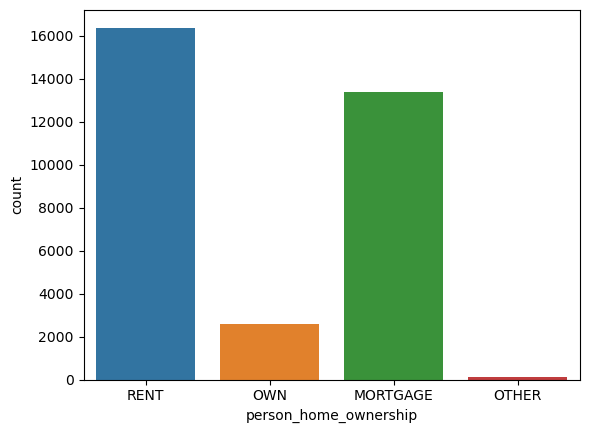

In [21]:
sns.countplot(dataset["person_home_ownership"])

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

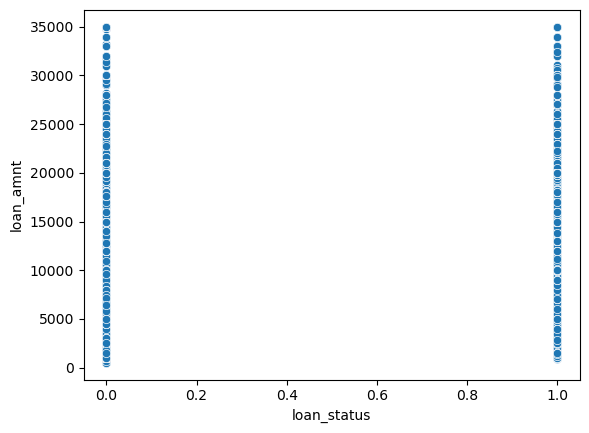

In [22]:
sns.scatterplot(x = dataset["loan_status"], y = dataset["loan_amnt"])

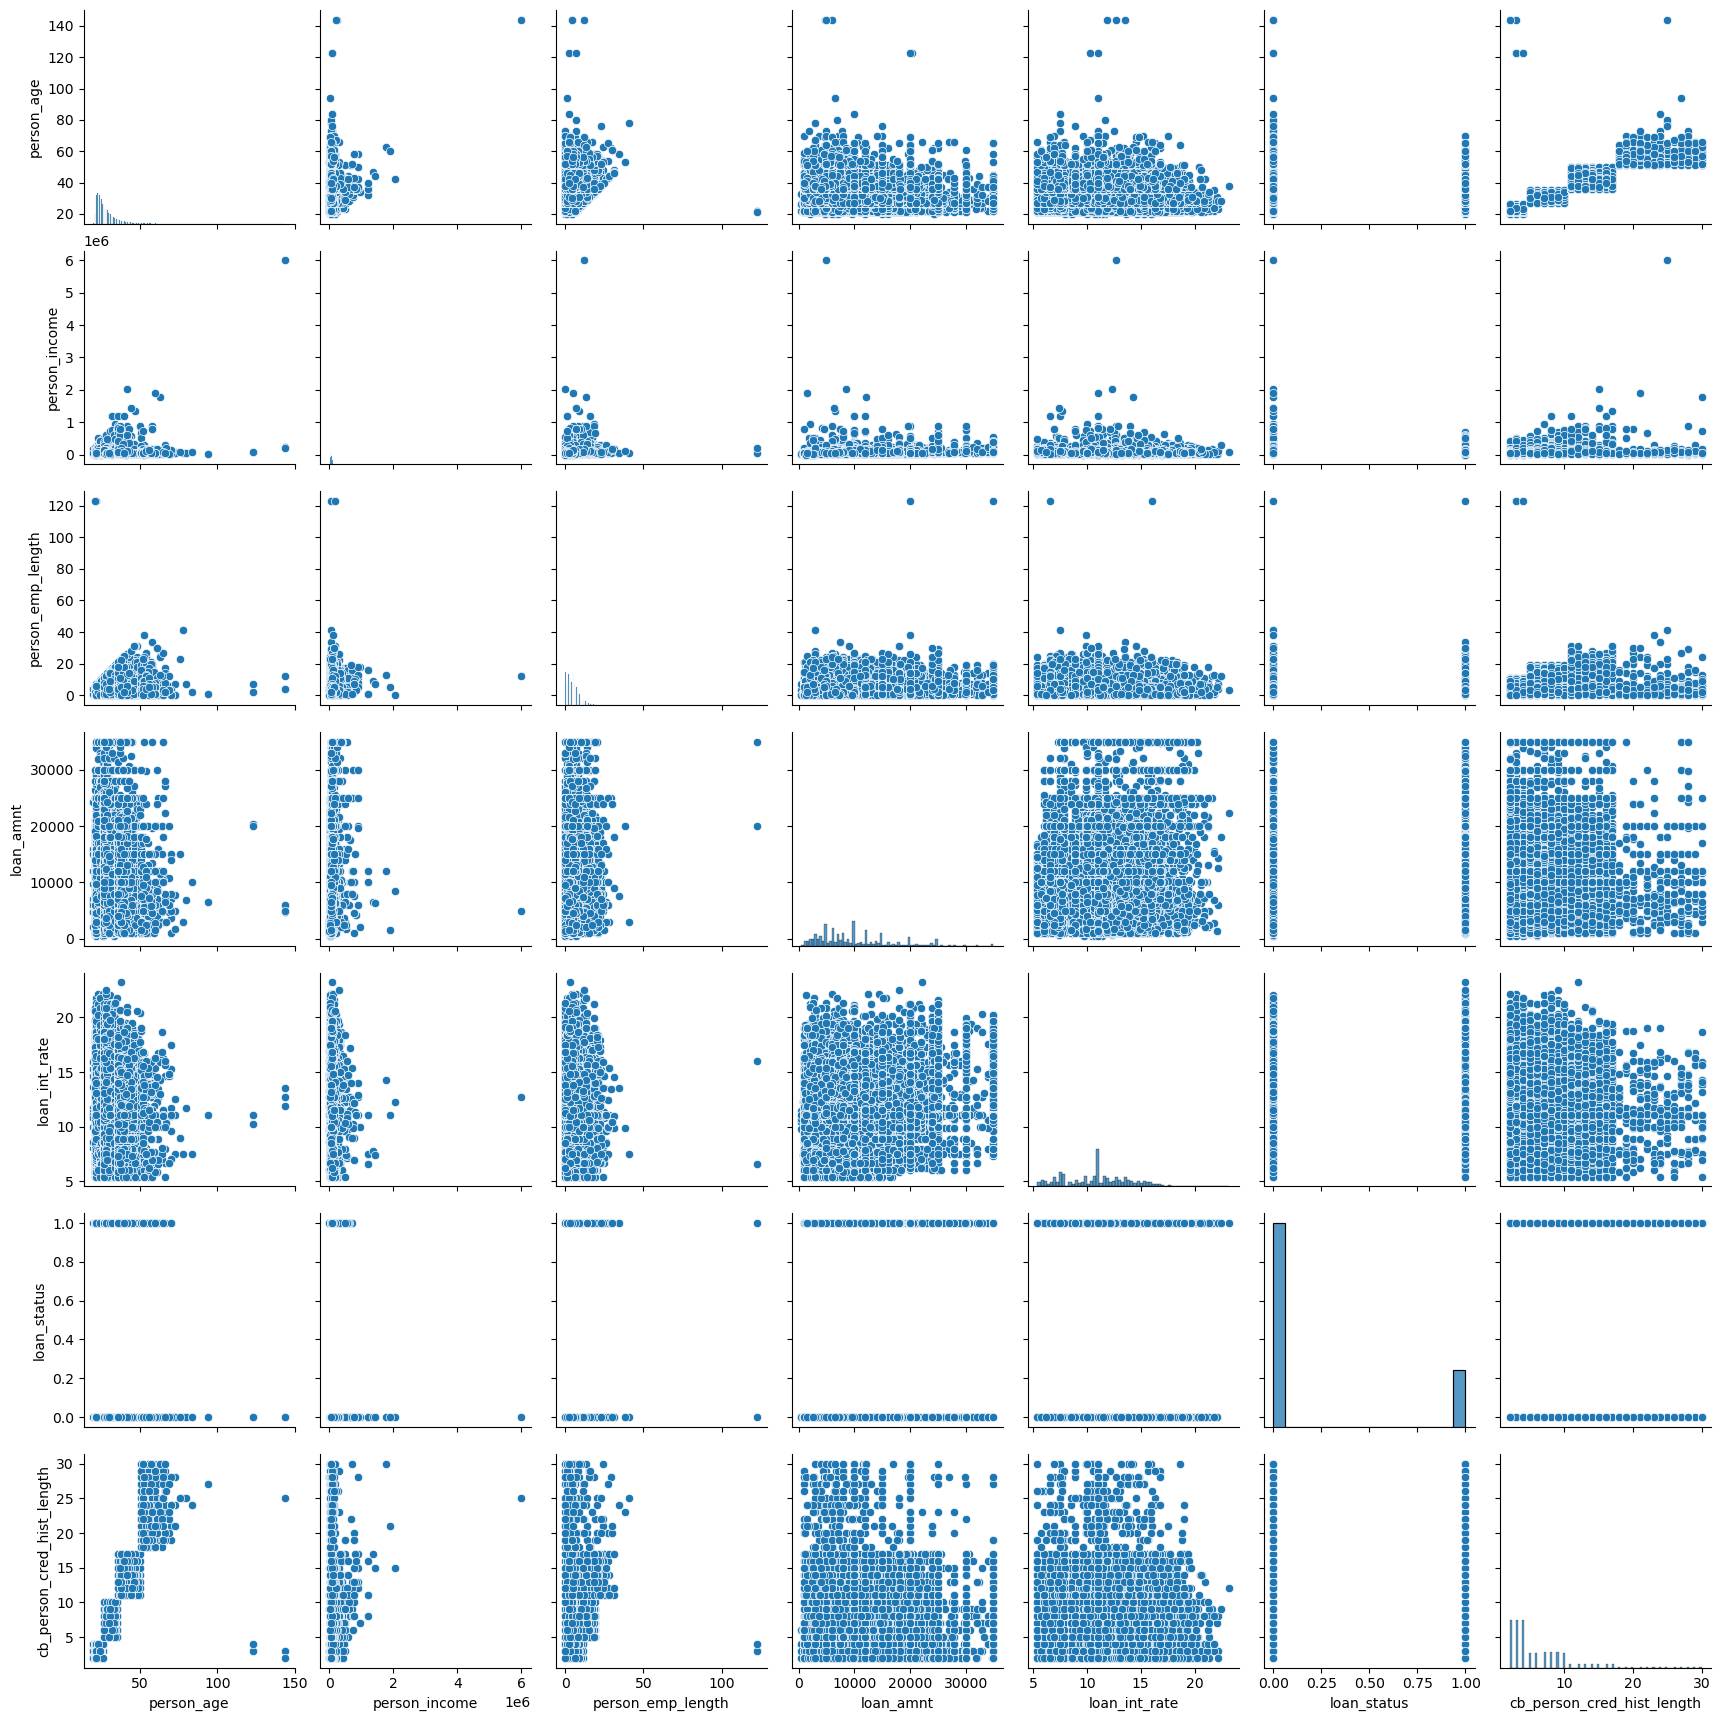

In [23]:
sns.pairplot(dataset)

### Splitting the data into Independent and Dependent variable

In [120]:
X = dataset.drop("loan_status", axis=1)

In [121]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,Y,4
...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,N,26


## One Hot Encoding

In [122]:
from sklearn.preprocessing import OneHotEncoder

In [123]:
from sklearn.compose import ColumnTransformer

In [124]:
oh = OneHotEncoder()

In [125]:
ct = ColumnTransformer(transformers = [("ohe", oh,["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"])], remainder = "passthrough")

In [126]:
X = ct.fit_transform(X)

In [127]:
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 3.500e+04, 1.602e+01,
        3.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+03, 1.114e+01,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 5.500e+03, 1.287e+01,
        3.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.500e+04, 1.099e+01,
        2.800e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.500e+04, 1.148e+01,
        2.600e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.475e+03, 9.990e+00,
        3.000e+01]])

In [128]:
ct.get_feature_names_out()

array(['ohe__person_home_ownership_MORTGAGE',
       'ohe__person_home_ownership_OTHER',
       'ohe__person_home_ownership_OWN',
       'ohe__person_home_ownership_RENT',
       'ohe__loan_intent_DEBTCONSOLIDATION', 'ohe__loan_intent_EDUCATION',
       'ohe__loan_intent_HOMEIMPROVEMENT', 'ohe__loan_intent_MEDICAL',
       'ohe__loan_intent_PERSONAL', 'ohe__loan_intent_VENTURE',
       'ohe__loan_grade_A', 'ohe__loan_grade_B', 'ohe__loan_grade_C',
       'ohe__loan_grade_D', 'ohe__loan_grade_E', 'ohe__loan_grade_F',
       'ohe__loan_grade_G', 'ohe__cb_person_default_on_file_N',
       'ohe__cb_person_default_on_file_Y', 'remainder__person_age',
       'remainder__person_income', 'remainder__person_emp_length',
       'remainder__loan_amnt', 'remainder__loan_int_rate',
       'remainder__cb_person_cred_hist_length'], dtype=object)

In [129]:
column_names = []
for each_col in ct.get_feature_names_out():
    column_names.append(each_col.split("_")[-1])

In [130]:
column_names

['MORTGAGE',
 'OTHER',
 'OWN',
 'RENT',
 'DEBTCONSOLIDATION',
 'EDUCATION',
 'HOMEIMPROVEMENT',
 'MEDICAL',
 'PERSONAL',
 'VENTURE',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'N',
 'Y',
 'age',
 'income',
 'length',
 'amnt',
 'rate',
 'length']

In [131]:
X = pd.DataFrame(X)

In [132]:
X.columns = column_names

In [133]:
X

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,F,G,N,Y,age,income,length,amnt,rate,length
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,22.0,59000.0,123.0,35000.0,16.02,3.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,21.0,9600.0,5.0,1000.0,11.14,2.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,25.0,9600.0,1.0,5500.0,12.87,3.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,23.0,65500.0,4.0,35000.0,15.23,2.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,24.0,54400.0,8.0,35000.0,14.27,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32411,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,57.0,53000.0,1.0,5800.0,13.16,30.0
32412,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,54.0,120000.0,4.0,17625.0,7.49,19.0
32413,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,65.0,76000.0,3.0,35000.0,10.99,28.0
32414,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,56.0,150000.0,5.0,15000.0,11.48,26.0


In [134]:
y = dataset["loan_status"]

### Train Test Split

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 35)

In [137]:
X_train

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,F,G,N,Y,age,income,length,amnt,rate,length
14657,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,23.0,36000.0,3.0,15000.0,14.590000,4.0
19541,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,34.0,40800.0,2.0,3200.0,12.610000,8.0
16029,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,26.0,94000.0,1.0,5000.0,7.680000,3.0
20801,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,27.0,112440.0,9.0,9000.0,11.017265,7.0
16153,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,26.0,33600.0,4.0,3300.0,15.650000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23532,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,27.0,65000.0,11.0,8000.0,7.490000,8.0
15393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,24.0,132132.0,8.0,28000.0,8.490000,3.0
9143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,22.0,60000.0,3.0,2000.0,7.400000,2.0
17679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,26.0,34000.0,6.0,12000.0,6.030000,2.0


In [138]:
X_test

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,F,G,N,Y,age,income,length,amnt,rate,length
11756,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,25.0,80004.0,5.0,10000.0,9.620000,4.0
273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,24.0,91800.0,4.0,25000.0,13.430000,3.0
6702,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,22.0,52800.0,6.0,6000.0,11.970000,2.0
19165,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,31.0,40000.0,5.0,2500.0,13.230000,5.0
28509,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,35.0,54000.0,1.0,9000.0,14.460000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,24.0,55000.0,0.0,6000.0,6.030000,4.0
25606,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,28.0,28800.0,1.0,12250.0,10.590000,9.0
8579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,25.0,53000.0,9.0,10625.0,11.017265,4.0
8839,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,22.0,60000.0,6.0,2800.0,10.990000,4.0


In [139]:
y_train

14657    1
19663    0
16034    0
20923    0
16169    0
        ..
23654    0
15393    0
9143     0
17800    0
5833     0
Name: loan_status, Length: 24312, dtype: int64

### Feature Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
sc = MinMaxScaler()

In [46]:
X_train = sc.fit_transform(X_train)

In [47]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.42028986, 0.51516854,
        0.07142857],
       [0.        , 0.        , 0.        , ..., 0.07826087, 0.40393258,
        0.21428571],
       [1.        , 0.        , 0.        , ..., 0.13043478, 0.12696629,
        0.03571429],
       ...,
       [1.        , 0.        , 0.        , ..., 0.04347826, 0.11123596,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.03426966,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.29275362, 0.59213483,
        0.07142857]])

In [48]:
X_test = sc.transform(X_test)

In [49]:
y_train = y_train.astype("float")

## Building the model

### 1. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lor_model = LogisticRegression()

In [52]:
lor_model.fit(X_train,y_train)

LogisticRegression()

### Prediction

In [53]:
y_pred = lor_model.predict(X_test)

In [54]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
y_test

11756    0
273      0
6702     1
19287    0
28651    1
        ..
6667     0
25728    1
8579     1
8839     0
25329    0
Name: loan_status, Length: 8104, dtype: int64

### Evaluation

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
lor_test_score = accuracy_score(y_test, y_pred)

In [58]:
lor_test_score

0.8365004935834156

In [59]:
lor_test_score * 100

83.65004935834156

In [60]:
#the above score indicates that aprrox 84% of the prediction are correct

In [61]:
y_pred_train = lor_model.predict(X_train)

In [62]:
y_pred_train

array([1., 0., 0., ..., 0., 0., 0.])

In [63]:
y_train

14657    1.0
19663    0.0
16034    0.0
20923    0.0
16169    0.0
        ... 
23654    0.0
15393    0.0
9143     0.0
17800    0.0
5833     0.0
Name: loan_status, Length: 24312, dtype: float64

In [64]:
lor_train_score = accuracy_score(y_train, y_pred_train)

In [65]:
lor_train_score

0.8370763409016124

### 2. KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn_model = KNeighborsClassifier(n_neighbors = 5, p = 2, n_jobs = -1)

In [68]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

### Prediction

In [69]:
y_pred = knn_model.predict(X_test)

In [70]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [71]:
y_test

11756    0
273      0
6702     1
19287    0
28651    1
        ..
6667     0
25728    1
8579     1
8839     0
25329    0
Name: loan_status, Length: 8104, dtype: int64

In [72]:
y_pred_train = knn_model.predict(X_train)

### Evaluation

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
knn_test_score = accuracy_score(y_test, y_pred)

In [75]:
knn_test_score

0.8397087857847977

In [76]:
knn_test_score * 100

83.97087857847977

In [77]:
#the above score indicates that aprrox 84% of the prediction are correct

In [78]:
y_pred_train = knn_model.predict(X_train)

In [79]:
y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

In [80]:
y_train

14657    1.0
19663    0.0
16034    0.0
20923    0.0
16169    0.0
        ... 
23654    0.0
15393    0.0
9143     0.0
17800    0.0
5833     0.0
Name: loan_status, Length: 24312, dtype: float64

In [81]:
knn_train_score = accuracy_score(y_train, y_pred_train)

In [82]:
knn_train_score

0.8762750904902928

### 3. Support Vector Machine (SVM)

In [83]:
from sklearn.svm import SVC

In [84]:
svm_model = SVC(kernel='rbf', C=1, random_state = 50)

In [85]:
svm_model.fit(X_train,y_train)

SVC(C=1, random_state=50)

### Prediction

In [86]:
y_pred = svm_model.predict(X_test)

In [87]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
y_test

11756    0
273      0
6702     1
19287    0
28651    1
        ..
6667     0
25728    1
8579     1
8839     0
25329    0
Name: loan_status, Length: 8104, dtype: int64

In [89]:
y_pred_train = svm_model.predict(X_train)

### Evaluation

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
svm_test_score = accuracy_score(y_test, y_pred)

In [92]:
svm_test_score

0.8450148075024679

In [93]:
svm_test_score * 100

84.5014807502468

In [94]:
#the above score indicates that aprrox 84% of the prediction are correct

In [95]:
y_pred_train = svm_model.predict(X_train)

In [96]:
y_pred_train

array([1., 0., 0., ..., 0., 0., 0.])

In [97]:
y_train

14657    1.0
19663    0.0
16034    0.0
20923    0.0
16169    0.0
        ... 
23654    0.0
15393    0.0
9143     0.0
17800    0.0
5833     0.0
Name: loan_status, Length: 24312, dtype: float64

In [98]:
svm_train_score = accuracy_score(y_train, y_pred_train)

In [99]:
svm_train_score

0.8440276406712734

### 4. Decision Tree 

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)

In [102]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### Prediction

In [103]:
y_pred = dt_model.predict(X_test)

In [104]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [105]:
y_test

11756    0
273      0
6702     1
19287    0
28651    1
        ..
6667     0
25728    1
8579     1
8839     0
25329    0
Name: loan_status, Length: 8104, dtype: int64

In [106]:
y_pred_train = dt_model.predict(X_train)

### Evaluation

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
dt_test_score = accuracy_score(y_test, y_pred)

In [109]:
dt_test_score

0.8875863770977295

In [110]:
dt_test_score * 100

88.75863770977294

In [111]:
#the above score indicates that aprrox 84% of the prediction are correct

In [112]:
y_pred_train = dt_model.predict(X_train)

In [113]:
y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

In [114]:
y_train

14657    1.0
19663    0.0
16034    0.0
20923    0.0
16169    0.0
        ... 
23654    0.0
15393    0.0
9143     0.0
17800    0.0
5833     0.0
Name: loan_status, Length: 24312, dtype: float64

In [115]:
dt_train_score = accuracy_score(y_train, y_pred_train)

In [116]:
dt_train_score

0.8874629812438302

### Plotting Decision Tree

In [117]:
from sklearn.tree import plot_tree

In [118]:
y_train.value_counts()

0.0    19028
1.0     5284
Name: loan_status, dtype: int64

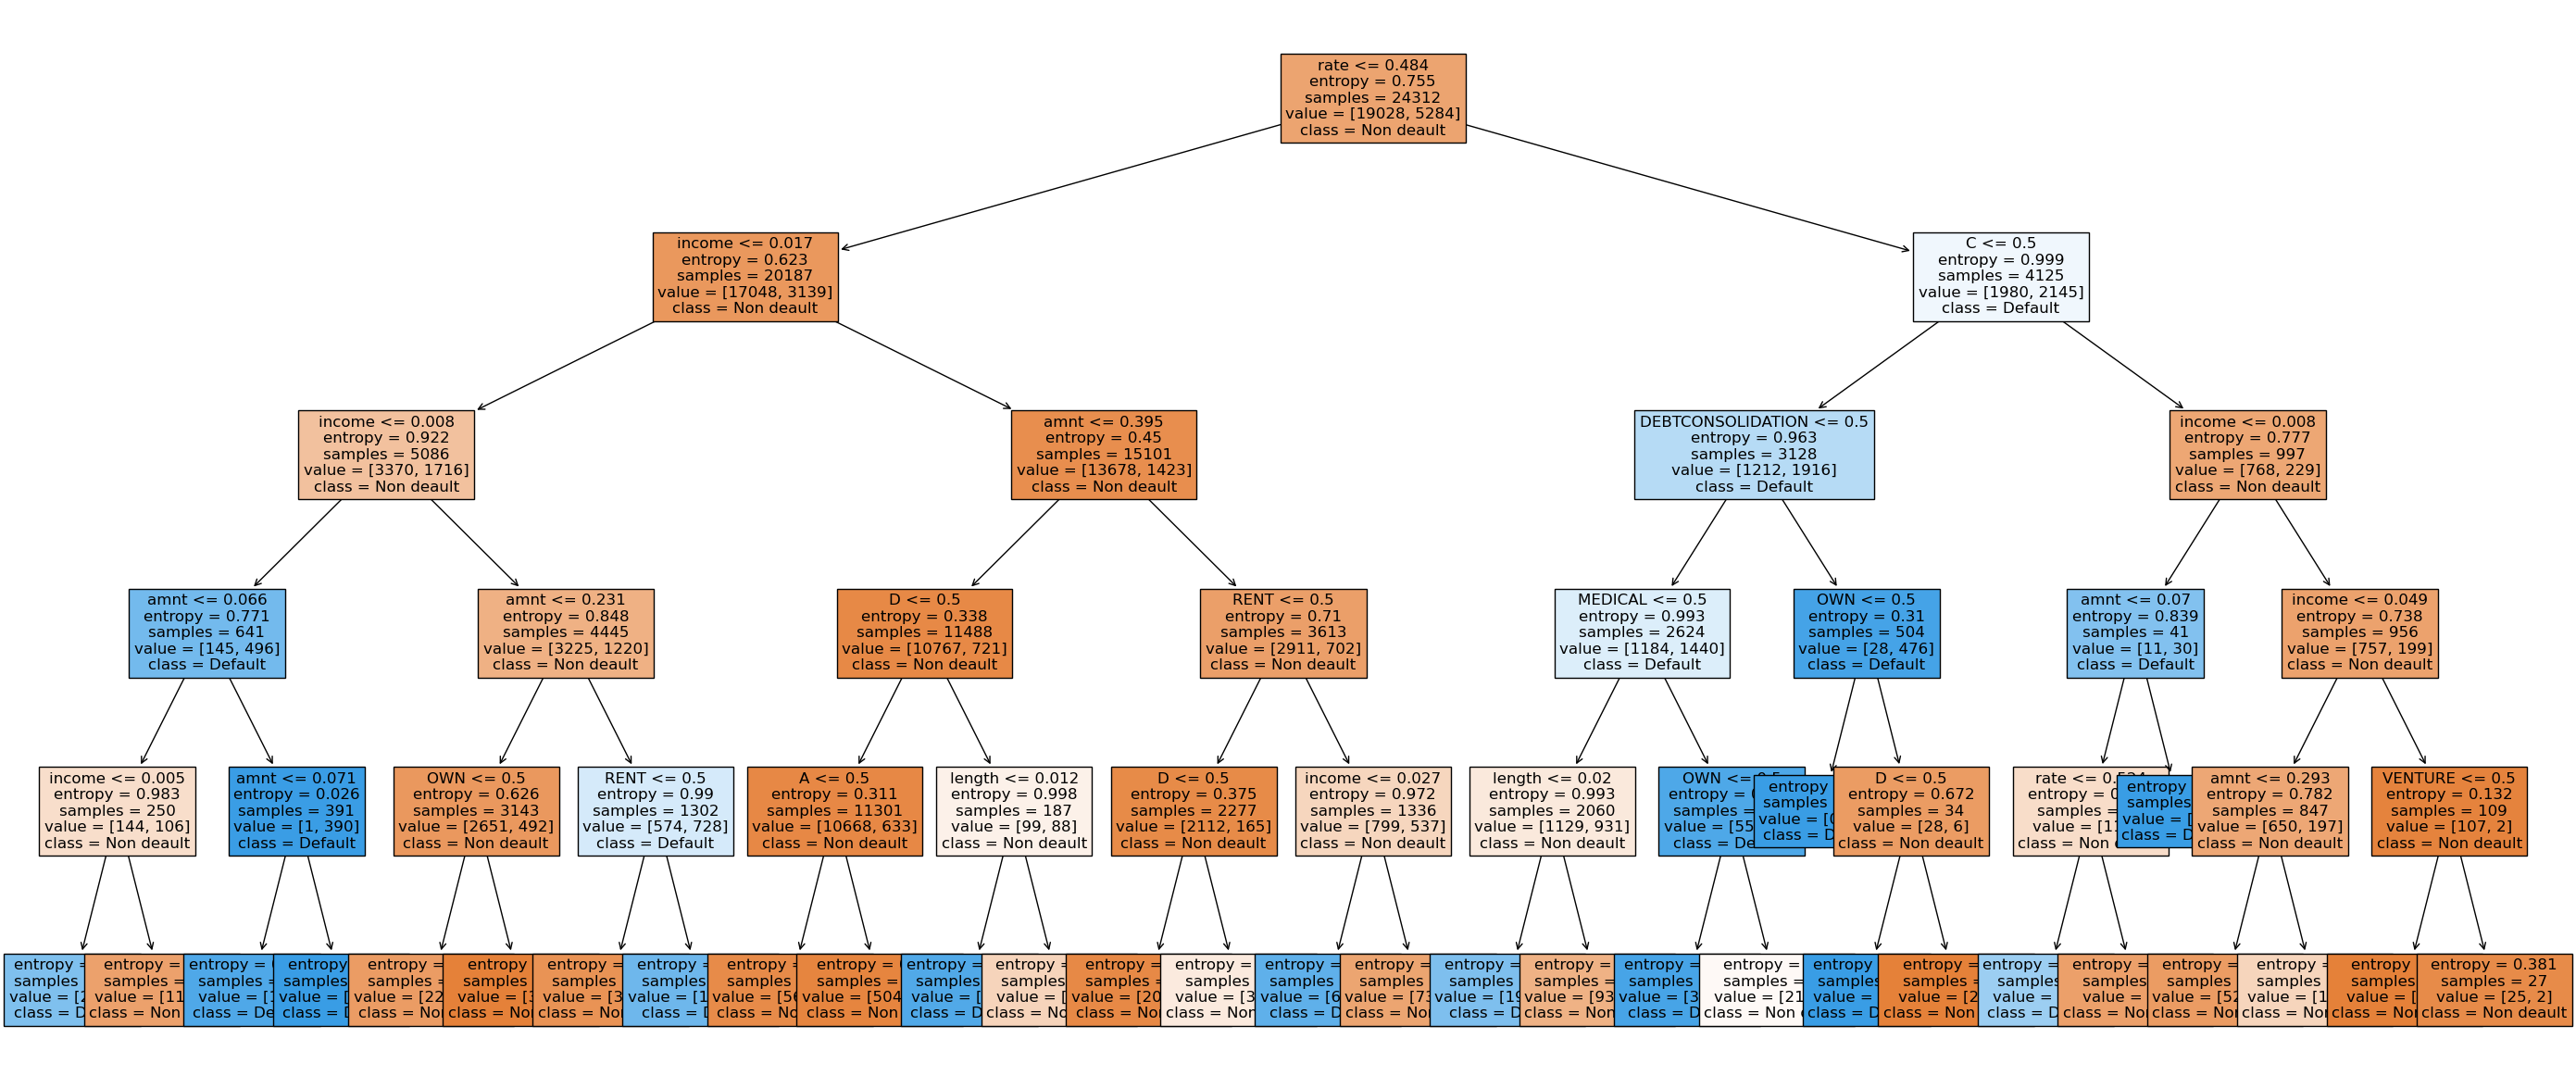

In [140]:
plt.figure(figsize = (35,15))
plot_tree(dt_model, filled = True, fontsize = 12, feature_names = X_train.columns, class_names = ["Non deault","Default"])
plt.show()

### 5. Random Forest 

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf_model = RandomForestClassifier(n_estimators = 10, criterion = "entropy",n_jobs = -1,random_state= 50, max_depth=10)

In [143]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10,
                       n_jobs=-1, random_state=50)

### Prediction

In [144]:
y_pred = rf_model.predict(X_test)

In [145]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
y_test

11756    0
273      0
6702     1
19287    0
28651    1
        ..
6667     0
25728    1
8579     1
8839     0
25329    0
Name: loan_status, Length: 8104, dtype: int64

In [147]:
y_pred_train = rf_model.predict(X_train)

### Evaluation

In [148]:
from sklearn.metrics import accuracy_score

In [149]:
rf_test_score = accuracy_score(y_test, y_pred)

In [150]:
rf_test_score

0.9051085883514314

In [151]:
rf_test_score * 100

90.51085883514314

In [152]:
y_pred_train = rf_model.predict(X_train)

In [153]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
y_train

14657    1
19663    0
16034    0
20923    0
16169    0
        ..
23654    0
15393    0
9143     0
17800    0
5833     0
Name: loan_status, Length: 24312, dtype: int64

In [155]:
rf_train_score = accuracy_score(y_train, y_pred_train)

In [156]:
rf_train_score

0.9170779861796644

### Plotting Decision Tree

In [157]:
from sklearn.tree import plot_tree

In [158]:
y_train.value_counts()

0    19028
1     5284
Name: loan_status, dtype: int64

In [159]:
rf_model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=2124297904),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=554800608),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=979609483),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=319445101),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=1097252129),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=472180702),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=1702224004),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
              

In [160]:
rf_model.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       random_state=2124297904)

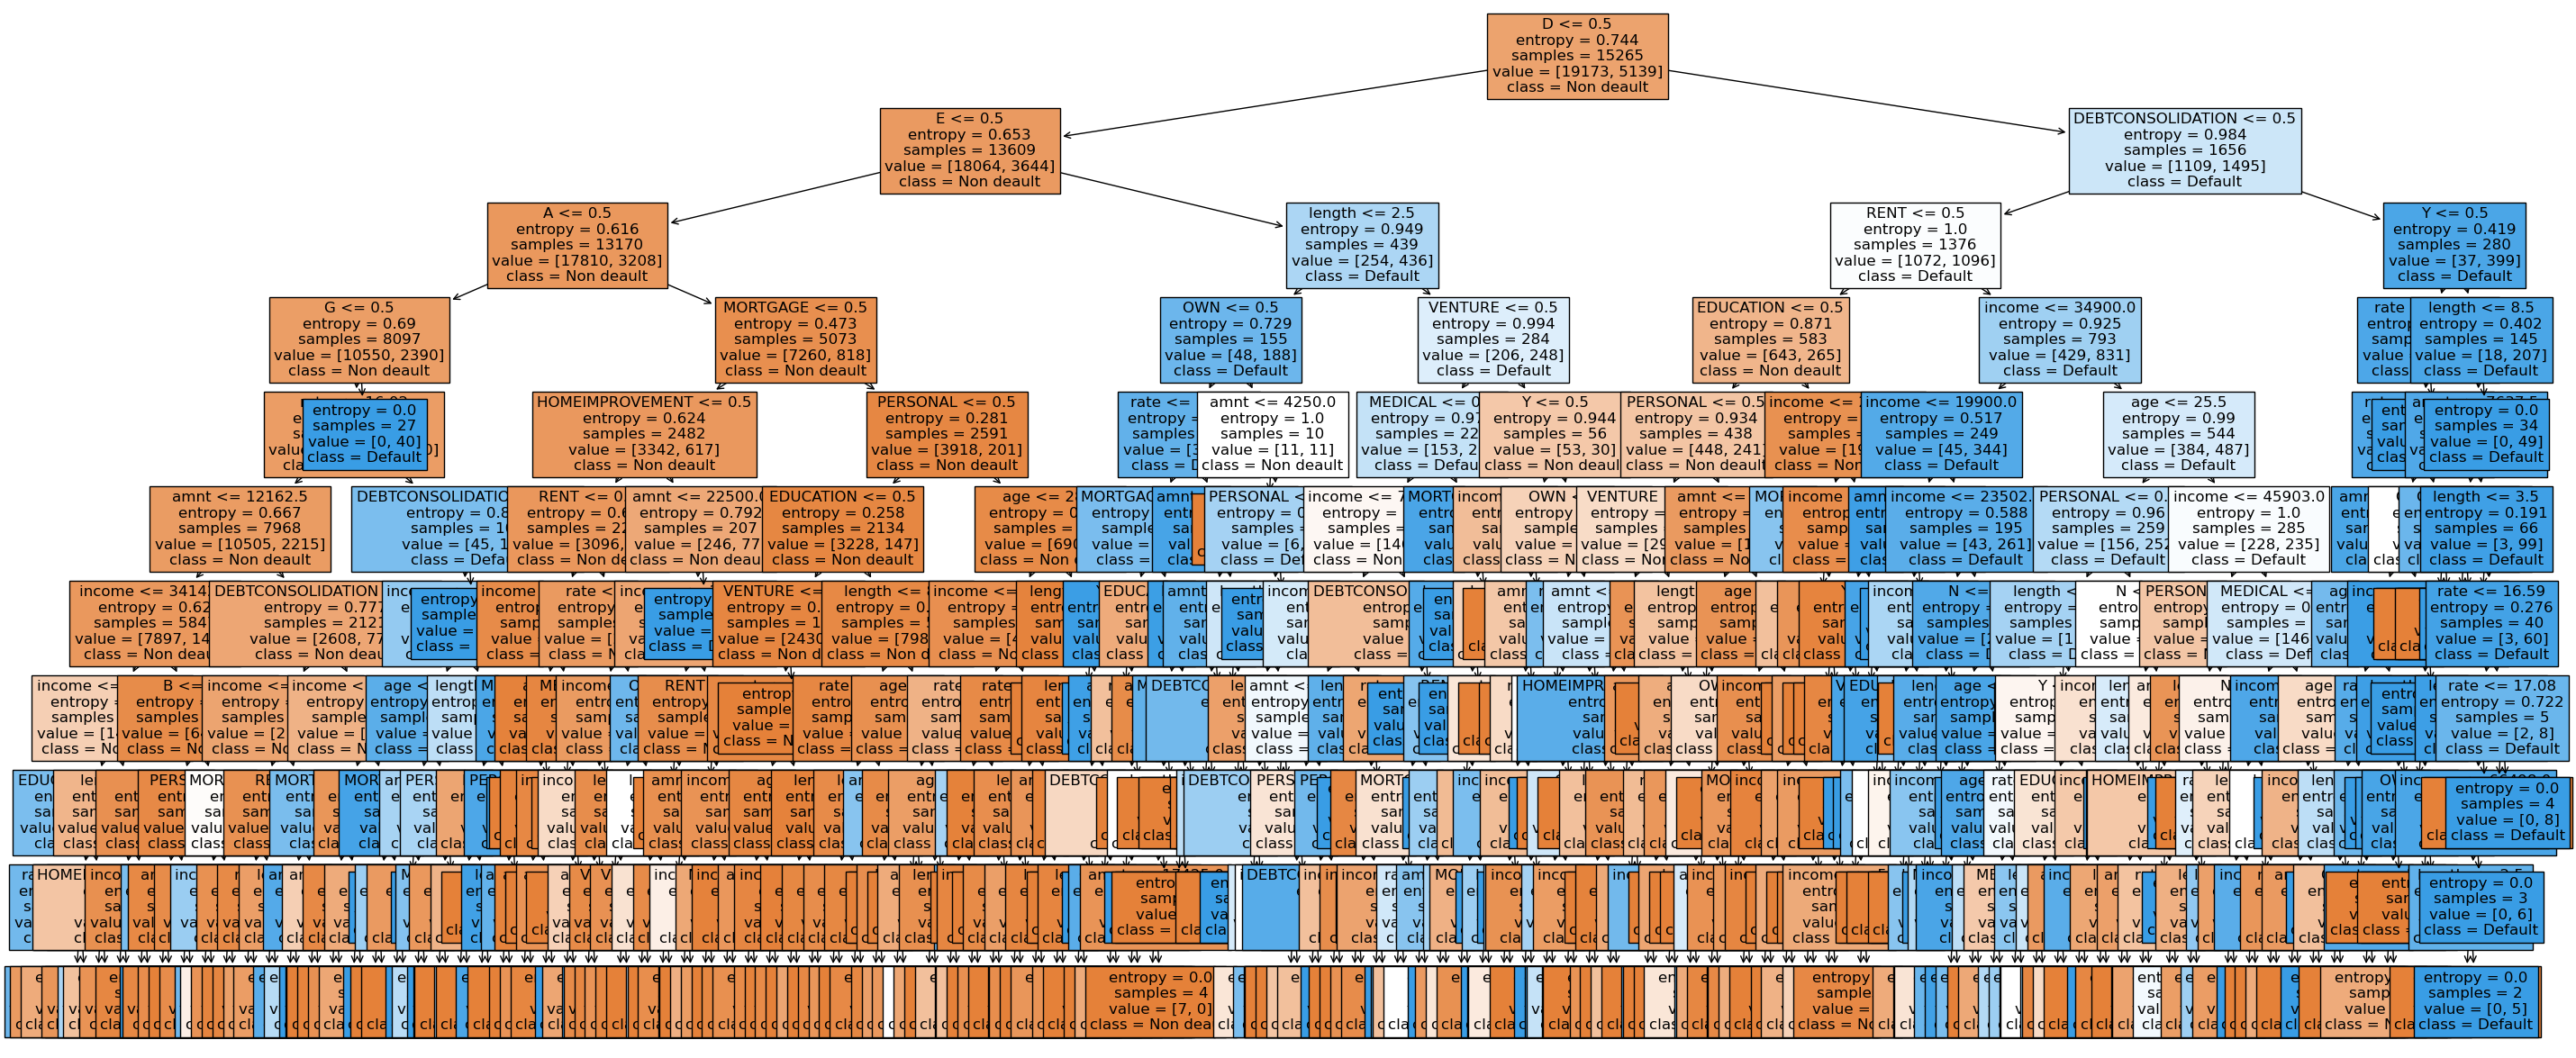

In [161]:
plt.figure(figsize = (35,15))
plot_tree(rf_model.estimators_[0], filled = True, fontsize = 12, feature_names = X_train.columns, class_names = ["Non deault","Default"])
plt.show()

### Real Time Prediction

In [162]:
new_customer = X.iloc[10:11,:]

In [163]:
new_customer

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,F,G,N,Y,age,income,length,amnt,rate,length
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,22.0,85000.0,6.0,35000.0,10.37,4.0


In [164]:
new_customer = sc.transform(new_customer)

In [165]:
new_customer

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.01612903,
        0.03978811, 0.04878049, 1.        , 0.27808989, 0.07142857]])

In [166]:
for idx, each_model in enumerate(rf_model.estimators_):
    print(f"Decision Tree {idx} :", each_model.predict(new_customer))

Decision Tree 0 : [1.]
Decision Tree 1 : [0.]
Decision Tree 2 : [0.]
Decision Tree 3 : [1.]
Decision Tree 4 : [1.]
Decision Tree 5 : [0.]
Decision Tree 6 : [0.]
Decision Tree 7 : [0.]
Decision Tree 8 : [1.]
Decision Tree 9 : [0.]


In [167]:
rf_model.predict(new_customer)

array([0], dtype=int64)

### All Algorithm along with Score

In [168]:
all_model = {"Model":["Logistic_Regression","KNN","SVM","Decision_Tree","Random_Forest"],
            "Accuracy_Score":[lor_test_score,knn_test_score,svm_test_score,dt_test_score,rf_test_score]}

In [169]:
model = pd.DataFrame(all_model)

In [170]:
model

,Model,Accuracy_Score
0,Logistic_Regression,0.836500
1,KNN,0.839709
2,SVM,0.845015
3,Decision_Tree,0.887586
4,Random_Forest,0.905109


The best model for Credit Risk Scoring prediction is Decision tree and Random Forest.